In [1]:
from ES import populational_isotropic_ES, populational_non_isotropic_ES, ESAlgorithm
import matplotlib.pyplot as plt
import numpy as np
from py_expression_eval import Parser
from functions_suganthan import zakharov_func, cec22_test_func
from plotting_aux import plot_1, plot_2
import decimal
parser = Parser()


## Comparação de resultados com número fixo de iterações
### Comparação dos Algoritmos - função de zakharov com 10 dimensões


In [4]:
def f1(seed=0):
    experiment = {}
    error_history = {'1p1':None, 'pi':None, 'pni':None}

    def zakharov_wrapper(x:list):
        return cec22_test_func(x, 10, 1, 1)[0]

    alg = ESAlgorithm()
    alg.set_evaluation_function(zakharov_wrapper)
    alg.set_num_dimensions(10)
    alg.set_global_variable_bounds(100, True, -100, True)
    alg.set_known_minimum(300)

    res_1 = alg.one_plus_one_ES_test(sigma=0.5, c=0.817, n=10, iter=8000, seed=seed)
    error_history['1p1'] = alg.get_execution_history()
    res_2 = alg.populational_isotropic_ES_test(sigma_var=0.5, dimension_gen_interval=(-10, 10), iter=100, seed=seed, num_parents=10, num_offspring=80)
    error_history['pi'] = alg.get_execution_history()
    res_3 = alg.populational_non_isotropic_ES_test(sigma_var=0.5, dimension_gen_interval=(-10, 10), iter=100, seed=seed, num_parents=10, num_offspring=80)
    error_history['pni'] = alg.get_execution_history()

    experiment['1p1'] =  res_1[-2:-1][0]['eval']
    experiment['pi'] =  res_2[0]['eval']
    experiment['pni'] =  res_3[0]['eval']

    return experiment, error_history

experiments = []
error_histories = []
num_exp = 30
for i in range(num_exp):
    experiment, error_history = f1(i)
    experiments.append(experiment)
    error_histories.append(error_history)

print(error_histories)

[{'1p1': {'checkpoints': [], 'values': []}, 'pi': {'checkpoints': [], 'values': []}, 'pni': {'checkpoints': [90, 170, 250, 330, 410, 490, 570, 650, 730, 810, 890, 1290, 2010, 3210, 5050, 8010, 8010], 'values': [5735125102.097292, 3928036262.026413, 1901505394.617761, 41606317.263158806, 7861187.139880142, 159159.84798227382, 14886.699155041126, 14886.699155041126, 14830.765811987843, 14830.765811987843, 14830.765811987843, 13478.148586947837, 11716.9430241774, 9128.587019322302, 6997.470743636215, 3815.75017417243, 3815.75017417243]}}, {'1p1': {'checkpoints': [], 'values': []}, 'pi': {'checkpoints': [], 'values': []}, 'pni': {'checkpoints': [90, 170, 250, 330, 410, 490, 570, 650, 730, 810, 890, 1290, 2010, 3210, 5050, 8010, 8010], 'values': [1407373228.2104461, 1184870813.3475158, 748122664.8104329, 302078034.05905306, 124233385.04724008, 2473899.7176812263, 18737.329413101186, 14661.034892162977, 14532.79619967054, 14532.79619967054, 14210.782440430952, 12877.486946334924, 12394.66764

[5252857435.176594, 4231841991.105557, 3121612292.976514, 2008874821.9454205, 1014413473.971451, 378404228.60457975, 147951452.75642726, 19098321.086638886, 993611.2157348089, 61578.491529987376, 32868.45551438482, 11902.311464502523, 10020.2894391728, 7490.379863939624, 4965.689723806852, 2899.0016327699095, 2899.0016327699095]


C:\Users\patri\OneDrive\Desktop\Projects\estudos-iniciacao-cientifica\plotting_aux.py:36: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


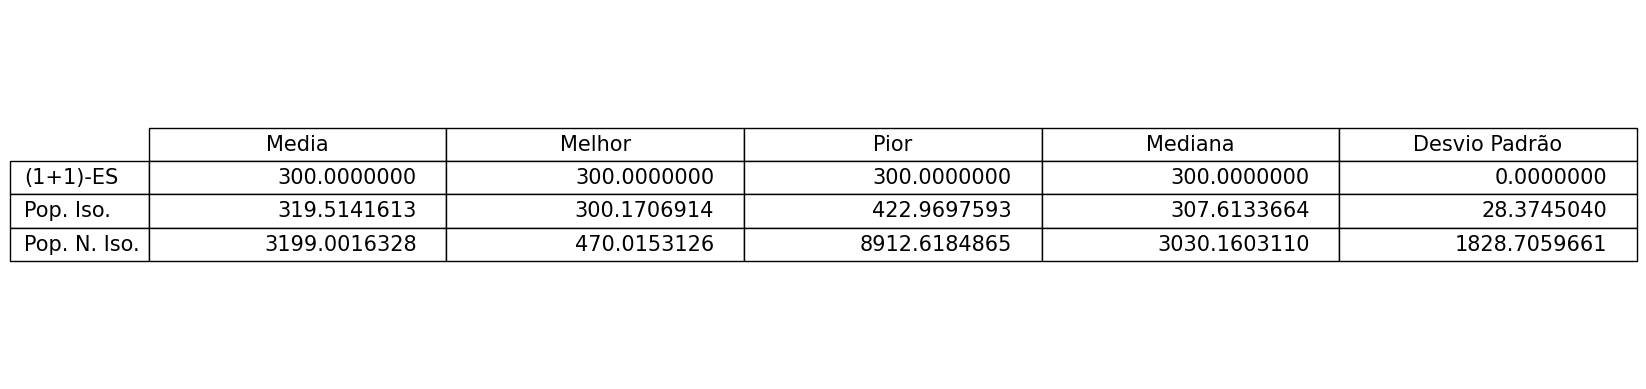

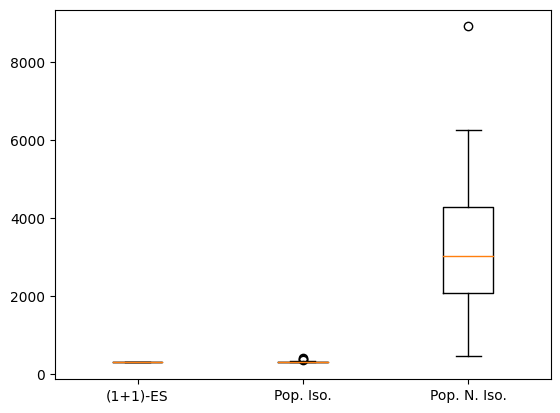

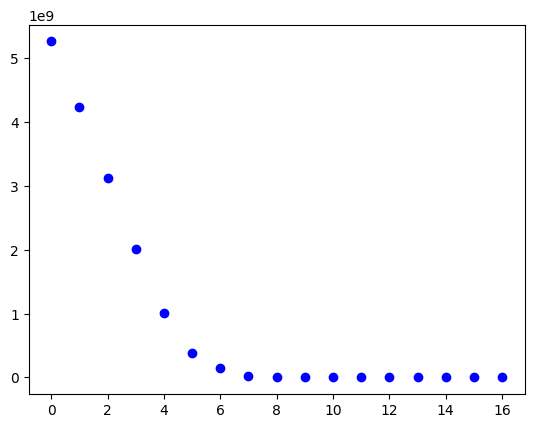

In [5]:
pni_errors = [0]*len(error_histories[0]['pni']['values'])
for e in error_histories:
    for i, val in enumerate(e['pni']['values']):
        pni_errors[i] += val/num_exp

print(pni_errors)

plot_1(experiments)
plot_2(pni_errors)

### Comparação dos Algoritmos - função de zakharov com 20 dimensões

In [2]:
def f1(seed=0):
    experiment = {}

    def zakharov_wrapper(x: list):
        return cec22_test_func(x, 20, 1, 1)[0]

    alg = ESAlgorithm()
    #alg.set_evaluation_expression("- abs (sin(x)*cos(y)*exp(abs(1 - ((sqrt(x^2 +y^2))/PI))))")
    alg.set_evaluation_function(zakharov_wrapper)
    alg.set_num_dimensions(20)
    alg.set_global_variable_bounds(100, True, -100, True)

    res_1 = alg.one_plus_one_ES_test(sigma=0.5, c=0.817, n=10, iter=8000, seed=seed)
    res_2 = alg.populational_isotropic_ES_test(sigma_var=0.5, dimension_gen_interval=(-10, 10), iter=100, seed=seed,
                                               num_parents=10, num_offspring=80)
    res_3 = alg.populational_non_isotropic_ES_test(sigma_var=0.5, dimension_gen_interval=(-10, 10), iter=100, seed=seed,
                                                   num_parents=10, num_offspring=80)

    experiment['1p1'] = res_1[-2:-1][0]['eval']
    experiment['pi'] = res_2[0]['eval']
    experiment['pni'] = res_3[0]['eval']

    return experiment


experiments = []
num_exp = 30
for i in range(num_exp):
    experiments.append(f1(i))

C:\Users\patri\AppData\Local\Temp\ipykernel_26500\1740846392.py:29: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


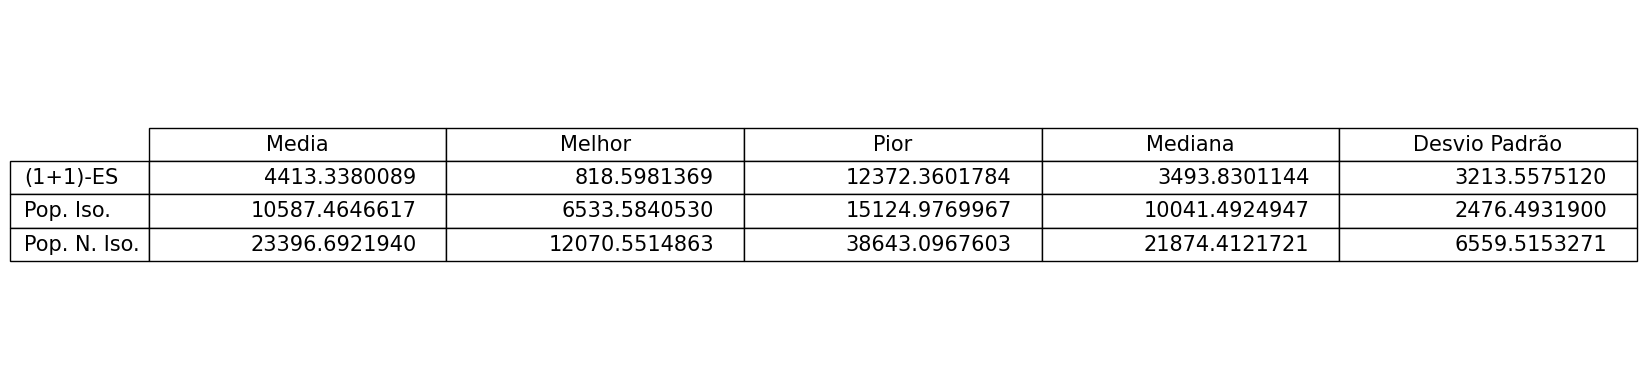

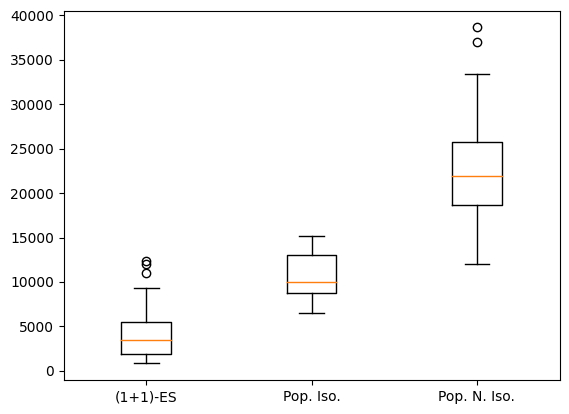

In [3]:

res_1p1 = [e['1p1'] for e in experiments]
res_pi = [e['pi'] for e in experiments]
res_pni = [e['pni'] for e in experiments]

tabela = [None, None, None]


def table_row(array):
    row = [f"{np.average(array):.7f}", f"{np.min(array):.7f}", f"{np.max(array):.7f}", f"{np.median(array):.7f}",
           f"{np.std(array):.7f}"]
    return row


tabela[0] = table_row(res_1p1)
tabela[1] = table_row(res_pi)
tabela[2] = table_row(res_pni)

fig, ax = plt.subplots()
# hide axes
fig.patch.set_visible(False)

ax.axis('off')
ax.axis('tight')
colLabels = ['Media', 'Melhor', 'Pior', 'Mediana', 'Desvio Padrão']
rowLabels = ["(1+1)-ES", "Pop. Iso.", "Pop. N. Iso."]
table = ax.table(tabela, colLabels=colLabels, rowLabels=rowLabels, loc='center')
table.scale(3, 2)
table.set_fontsize(15)
fig.tight_layout()

fig_boxplot, ax_boxplot = plt.subplots()
ax_boxplot.boxplot(x=[res_1p1, res_pi, res_pni], labels=["(1+1)-ES", "Pop. Iso.", "Pop. N. Iso."])

plt.show()